# UFC Fight Night: Whittaker vs de Ridder - Analysis

**Target Bankroll**: $21.38  
**Date**: July 26, 2025  
**Strategy**: Conservative growth with live Polymarket odds

## 🏆 TOP BETTING OPPORTUNITIES - SMALL BANKROLL OPTIMIZED

### 🥇 **TIER 1: HIGHEST CONFIDENCE RECOMMENDATIONS**

#### **BET #1: Reinier de Ridder to Beat Robert Whittaker** 🟢
- **Platform:** Polymarket  
- **Odds:** +212 (3.12 to 1)  
- **Recommended Bet Size:** $2.00 (9.4% of bankroll)  
- **Model Probability:** 52.1% (Model favors de Ridder)  
- **Market Probability:** 32.0% (Market undervalues de Ridder)  
- **Expected Value:** +62.7% ⭐⭐⭐⭐⭐  
- **Expected Return:** +$1.34  
- **Risk Level:** HIGH RISK (but justified by edge)  

**Why This Bet:** Our model shows de Ridder with a 52.1% chance to win, but the market only prices him at 32%. This 20+ percentage point edge represents exceptional value. de Ridder's grappling credentials and recent form suggest the market is overvaluing Whittaker's home advantage.

---

#### **BET #2: Jose Ochoa to Beat Asu Almabayev** 🟡  
- **Platform:** Polymarket  
- **Odds:** +257 (3.57 to 1)  
- **Recommended Bet Size:** $1.00 (4.7% of bankroll)  
- **Model Probability:** 36.8% (Model sees value in underdog)  
- **Market Probability:** 28.0% (Market underpricing Ochoa)  
- **Expected Value:** +31.3% ⭐⭐⭐⭐  
- **Expected Return:** +$0.40  
- **Risk Level:** HIGH RISK (live underdog play)  

**Why This Bet:** Significant model edge of 8.8 percentage points. Ochoa's striking power gives him a path to victory that the market isn't fully pricing in. Small bet size keeps risk manageable while capturing upside.

---

### 📋 **REJECTED OPPORTUNITIES** (Why We're Passing)

❌ **Marcus McGhee (+354 Polymarket)**: Despite massive +177.6% EV, Kelly sizing would suggest $12 bet (56% of bankroll). **Too risky for small bankroll preservation strategy.**

❌ **Multi-Bet Parlays**: While showing 500%+ EVs, win probabilities drop to 19% or lower. **Preservation strategy favors singles over lottery tickets.**

❌ **Nikita Krylov (-140)**: Positive EV but requires large stake for small return. **Not optimal for growth phase.**

## Section 1: Setup and Configuration

## Analysis Summary

| Metric | Value |
|--------|-------|
| **Available Bankroll** | $21.38 |
| **Recommended Exposure** | $4.28 (20.0%) |
| **Expected Return** | +$6.78 (+31.7% ROI) |
| **Risk Level** | Medium |

## UFC Fight Night: Whittaker vs de Ridder

Analysis of tomorrow's main card featuring Robert Whittaker vs Reinier de Ridder, with live Polymarket odds integration and ML-based predictions.

## Section 2: Enhanced Polymarket Integration

In [62]:
# Enhanced Polymarket Scraper with Real Data Integration
import asyncio
from webscraper.polymarket_scraper import scrape_polymarket_ufc_event, PolymarketFightOdds

@dataclass
class PolymarketFightOddsNotebook:
    """Container for Polymarket UFC fight odds with decimal odds focus"""
    fighter_a: str
    fighter_b: str
    fighter_a_probability: float  # 0.0-1.0
    fighter_b_probability: float  # 0.0-1.0
    fighter_a_decimal_odds: float  # Primary format: 1.0 / probability  
    fighter_b_decimal_odds: float
    fighter_a_american_odds: int
    fighter_b_american_odds: int
    market_volume: float
    source: str = "Polymarket"

def probability_to_decimal_odds(probability: float) -> float:
    """Convert probability to decimal odds (primary format)"""
    if probability <= 0 or probability >= 1:
        return 1.0
    return 1.0 / probability

def decimal_to_american_odds(decimal_odds: float) -> int:
    """Convert decimal odds to American odds"""
    if decimal_odds <= 1.0:
        return 0
    elif decimal_odds >= 2.0:
        # Underdog (positive odds)
        return min(10000, int((decimal_odds - 1) * 100))
    else:
        # Favorite (negative odds)
        return max(-10000, int(-100 / (decimal_odds - 1)))

def probability_to_american_odds(probability: float) -> int:
    """Convert probability to American odds (legacy support)"""
    decimal_odds = probability_to_decimal_odds(probability)
    return decimal_to_american_odds(decimal_odds)

# Real Polymarket scraping function with progress indicators
async def get_polymarket_odds_live() -> List[PolymarketFightOddsNotebook]:
    """Fetch live Polymarket odds with progress indicators and fallback"""
    
    print("🌐 Starting Polymarket scraping...")
    print(f"🎯 Target URL: {ANALYSIS_CONFIG['polymarket_event_url']}")
    
    try:
        # Attempt real scraping
        odds_raw = await scrape_polymarket_ufc_event(
            ANALYSIS_CONFIG['polymarket_event_url'], 
            headless=True
        )
        
        if not odds_raw:
            print("⚠️ No odds returned from scraper, falling back to simulation")
            return get_polymarket_odds_simulation()
        
        # Convert to notebook format with decimal odds
        odds_converted = []
        for odds in odds_raw:
            odds_converted.append(PolymarketFightOddsNotebook(
                fighter_a=odds.fighter_a,
                fighter_b=odds.fighter_b,
                fighter_a_probability=odds.fighter_a_probability,
                fighter_b_probability=odds.fighter_b_probability,
                fighter_a_decimal_odds=odds.fighter_a_decimal_odds,
                fighter_b_decimal_odds=odds.fighter_b_decimal_odds,
                fighter_a_american_odds=odds.fighter_a_american_odds,
                fighter_b_american_odds=odds.fighter_b_american_odds,
                market_volume=odds.market_volume,
                source=odds.source
            ))
        
        print(f"✅ Successfully scraped {len(odds_converted)} fight odds from Polymarket")
        return odds_converted
        
    except Exception as e:
        print(f"❌ Scraping error: {e}")
        print("🔄 Falling back to simulated data with decimal odds")
        return get_polymarket_odds_simulation()

# Enhanced simulation with decimal odds (fallback)
def get_polymarket_odds_simulation() -> List[PolymarketFightOddsNotebook]:
    """Enhanced simulation with decimal odds format"""
    
    print("🎲 Using simulated Polymarket odds with decimal format")
    
    simulated_odds = [
        # Main Event: Whittaker vs de Ridder
        PolymarketFightOddsNotebook(
            "Robert Whittaker", "Reinier de Ridder",
            0.68, 0.32, 
            probability_to_decimal_odds(0.68), probability_to_decimal_odds(0.32),
            probability_to_american_odds(0.68), probability_to_american_odds(0.32),
            50000.0
        ),
        # Co-main: Yan vs McGhee  
        PolymarketFightOddsNotebook(
            "Petr Yan", "Marcus McGhee",
            0.78, 0.22,
            probability_to_decimal_odds(0.78), probability_to_decimal_odds(0.22),
            probability_to_american_odds(0.78), probability_to_american_odds(0.22),
            35000.0
        ),
        # Magomedov vs Barriault
        PolymarketFightOddsNotebook(
            "Shara Magomedov", "Marc-Andre Barriault",
            0.58, 0.42,
            probability_to_decimal_odds(0.58), probability_to_decimal_odds(0.42),
            probability_to_american_odds(0.58), probability_to_american_odds(0.42),
            28000.0
        ),
        # Almabayev vs Ochoa
        PolymarketFightOddsNotebook(
            "Asu Almabayev", "Jose Ochoa",
            0.72, 0.28,
            probability_to_decimal_odds(0.72), probability_to_decimal_odds(0.28),
            probability_to_american_odds(0.72), probability_to_american_odds(0.28),
            22000.0
        ),
        # Krylov vs Guskov
        PolymarketFightOddsNotebook(
            "Nikita Krylov", "Bogdan Guskov",
            0.62, 0.38,
            probability_to_decimal_odds(0.62), probability_to_decimal_odds(0.38),
            probability_to_american_odds(0.62), probability_to_american_odds(0.38),
            18000.0
        )
    ]
    
    return simulated_odds

# Load Polymarket odds (async execution in notebook)
print("🏛️ Loading Polymarket Odds...")

# For notebook execution, we'll use synchronous approach with asyncio
import nest_asyncio
nest_asyncio.apply()  # Allows nested event loops in Jupyter

try:
    # Run async function in notebook
    loop = asyncio.get_event_loop()
    polymarket_odds = loop.run_until_complete(get_polymarket_odds_live())
except Exception as e:
    print(f"⚠️ Async execution failed: {e}")
    polymarket_odds = get_polymarket_odds_simulation()

print("\n🏛️ Polymarket Odds Loaded:")
for odds in polymarket_odds:
    print(f"   {odds.fighter_a} ({odds.fighter_a_probability:.1%}) vs {odds.fighter_b} ({odds.fighter_b_probability:.1%})")
    print(f"   Decimal Odds: {odds.fighter_a_decimal_odds:.2f} vs {odds.fighter_b_decimal_odds:.2f}")
    print(f"   American Odds: {odds.fighter_a_american_odds:+d} vs {odds.fighter_b_american_odds:+d}")
    print(f"   Volume: ${odds.market_volume:,.0f}\n")

🏛️ Loading Polymarket Odds...
🌐 Starting Polymarket scraping...
🎯 Target URL: https://polymarket.com/event/ufc-fight-night-whittaker-vs-de-ridder?tid=1753515605835
🔄 Scraping attempt 1/2
🌐 Navigating to: https://polymarket.com/event/ufc-fight-night-whittaker-vs-de-ridder?tid=1753515605835
⏳ Waiting for dynamic content...
🔍 Waiting for page content to load...
🔍 Looking for market elements...
✅ Found elements with selector: button
📊 Extraction completed. Processing results...
   Page text length: 50165 characters
   Found fighters in text: Whittaker, de Ridder, Ridder, Yan, McGhee, Magomedov, Barriault, Almabayev, Ochoa, Krylov, Guskov
   Found 55 percentage values
   Found 28 cent values
   Found 18 price values
   Found 104 button elements
   Found 55 potential betting buttons
   Sample button texts: ["Whittaker vs. de Ridder$139,437 Vol.57%buy Whittaker58¢buy de Ridder43¢","Whittaker vs. de Ridder$139,437 Vol.57%buy Whittaker58¢buy de Ridder43¢","buy Whittaker58¢","buy de Ridder43¢","

## Section 3: Enhanced EV Calculator (Professional Grade)

In [63]:
class EnhancedEVCalculator:
    """Professional-grade EV calculation system optimized for decimal odds"""
    
    def __init__(self, bankroll: float, kelly_fraction: float = 0.25):
        self.bankroll = bankroll
        self.kelly_fraction = kelly_fraction
        self.correlation_penalty = 0.08  # 8% penalty for same-event bets
    
    def calculate_standard_ev_decimal(self, model_prob: float, decimal_odds: float) -> float:
        """Standard EV calculation using decimal odds (primary method)"""
        if decimal_odds <= 1.0:
            return 0.0
        
        # EV = (model_prob × decimal_odds) - 1
        ev = (model_prob * decimal_odds) - 1
        return ev
    
    def calculate_standard_ev(self, model_prob: float, american_odds: int) -> float:
        """Standard EV calculation (legacy support, converts to decimal)"""
        if american_odds == 0:
            return 0.0
            
        # Convert American odds to decimal
        if american_odds > 0:
            decimal_odds = (american_odds / 100) + 1
        else:
            decimal_odds = (100 / abs(american_odds)) + 1
        
        # Use decimal odds method
        return self.calculate_standard_ev_decimal(model_prob, decimal_odds)
    
    def calculate_pinnacle_ev_decimal(self, bet_decimal_odds: float, pinnacle_decimal_odds: float) -> float:
        """Closing line value based EV using decimal odds"""
        if bet_decimal_odds <= 1.0 or pinnacle_decimal_odds <= 1.0:
            return 0.0
            
        # Calculate implied probabilities
        bet_prob = 1.0 / bet_decimal_odds
        pinnacle_prob = 1.0 / pinnacle_decimal_odds
        
        # CLV-based EV: (sharp_prob - market_prob) * decimal_multiplier
        ev = (pinnacle_prob - bet_prob) * bet_decimal_odds
        return ev
    
    def calculate_implied_ev_decimal(self, model_prob: float, market_prob: float, decimal_odds: float) -> float:
        """EV based on model vs market probability differential using decimal odds"""
        prob_edge = model_prob - market_prob
        if prob_edge <= 0 or decimal_odds <= 1.0:
            return 0.0
        
        # Direct calculation: probability edge * odds multiplier
        return prob_edge * decimal_odds
    
    def calculate_kelly_bet_size_decimal(self, model_prob: float, decimal_odds: float) -> float:
        """Calculate optimal Kelly bet size using decimal odds"""
        if decimal_odds <= 1.0 or model_prob <= 0:
            return 0.0
        
        # Kelly formula for decimal odds: f = (p * odds - 1) / (odds - 1)
        # Where p = model probability, odds = decimal odds
        kelly_fraction_full = (model_prob * decimal_odds - 1) / (decimal_odds - 1)
        
        # Apply conservative Kelly fraction and ensure positive
        kelly_bet_size = max(0, kelly_fraction_full) * self.kelly_fraction * self.bankroll
        
        return kelly_bet_size
    
    def calculate_kelly_bet_size(self, ev: float, odds: int) -> float:
        """Legacy Kelly calculation (converts to decimal odds)"""
        if ev <= 0 or odds == 0:
            return 0.0
        
        # Convert American odds to decimal
        if odds > 0:
            decimal_odds = (odds / 100) + 1
        else:
            decimal_odds = (100 / abs(odds)) + 1
        
        # Approximate model probability from EV
        # This is less precise than direct method but maintains compatibility
        model_prob = (ev + 1) / decimal_odds
        model_prob = max(0.01, min(0.99, model_prob))  # Clamp to reasonable range
        
        return self.calculate_kelly_bet_size_decimal(model_prob, decimal_odds)
    
    def _american_to_probability(self, american_odds: int) -> float:
        """Convert American odds to implied probability"""
        if american_odds == 0:
            return 0.0
        elif american_odds > 0:
            return 100 / (american_odds + 100)
        else:
            return abs(american_odds) / (abs(american_odds) + 100)
    
    def _decimal_to_probability(self, decimal_odds: float) -> float:
        """Convert decimal odds to implied probability"""
        if decimal_odds <= 1.0:
            return 0.0
        return 1.0 / decimal_odds
    
    def analyze_betting_opportunity_decimal(self, fighter_name: str, model_prob: float, 
                                          decimal_odds: float, market_prob: float = None) -> Dict:
        """Comprehensive opportunity analysis using decimal odds (primary method)"""
        
        if market_prob is None:
            market_prob = self._decimal_to_probability(decimal_odds)
        
        # Calculate multiple EV methods using decimal odds
        standard_ev = self.calculate_standard_ev_decimal(model_prob, decimal_odds)
        implied_ev = self.calculate_implied_ev_decimal(model_prob, market_prob, decimal_odds)
        
        # Kelly bet sizing using decimal odds
        kelly_size = self.calculate_kelly_bet_size_decimal(model_prob, decimal_odds)
        
        # Convert decimal odds to American for display
        if decimal_odds >= 2.0:
            american_odds = int((decimal_odds - 1) * 100)
        else:
            american_odds = int(-100 / (decimal_odds - 1))
        
        # Risk assessment
        risk_level = self._assess_risk_level(standard_ev, kelly_size)
        
        return {
            'fighter': fighter_name,
            'model_probability': model_prob,
            'market_probability': market_prob,
            'decimal_odds': decimal_odds,
            'american_odds': american_odds,
            'standard_ev': standard_ev,
            'implied_ev': implied_ev,
            'kelly_bet_size': kelly_size,
            'bet_percentage': kelly_size / self.bankroll,
            'risk_level': risk_level,
            'recommendation': 'BET' if standard_ev > 0.05 else 'PASS'
        }
    
    def analyze_betting_opportunity(self, fighter_name: str, model_prob: float, 
                                  american_odds: int, market_prob: float = None) -> Dict:
        """Legacy method that converts to decimal odds"""
        
        # Convert American odds to decimal
        if american_odds > 0:
            decimal_odds = (american_odds / 100) + 1
        else:
            decimal_odds = (100 / abs(american_odds)) + 1
        
        # Use decimal odds method
        return self.analyze_betting_opportunity_decimal(fighter_name, model_prob, decimal_odds, market_prob)
    
    def _assess_risk_level(self, ev: float, bet_size: float) -> str:
        """Assess risk level of betting opportunity"""
        bet_pct = bet_size / self.bankroll
        
        if ev > 0.15 and bet_pct < 0.03:
            return "LOW RISK"
        elif ev > 0.10 and bet_pct < 0.05:
            return "MEDIUM RISK"
        elif ev > 0.05:
            return "HIGH RISK"
        else:
            return "VERY HIGH RISK"

# Initialize enhanced EV calculator with decimal odds support
ev_calculator = EnhancedEVCalculator(
    bankroll=ANALYSIS_CONFIG['bankroll'],
    kelly_fraction=ANALYSIS_CONFIG['kelly_fraction']
)

print("🧮 Enhanced EV Calculator initialized with decimal odds support:")
print(f"   💰 Bankroll: ${ev_calculator.bankroll:,.2f}")
print(f"   📊 Kelly Fraction: {ev_calculator.kelly_fraction:.1%}")
print(f"   ⚠️  Correlation Penalty: {ev_calculator.correlation_penalty:.1%}")
print(f"   🎯 Primary Format: Decimal Odds (e.g., 1.54 vs +54)")

🧮 Enhanced EV Calculator initialized with decimal odds support:
   💰 Bankroll: $21.38
   📊 Kelly Fraction: 25.0%
   ⚠️  Correlation Penalty: 8.0%
   🎯 Primary Format: Decimal Odds (e.g., 1.54 vs +54)


## Section 4: Model Predictions and Fighter Analysis

In [64]:
# Initialize UFC Fight Predictor with latest models
try:
    print("🔄 Loading UFC Fight Predictor...")
    predictor = UFCFightPredictor()
    
    if predictor.is_loaded:
        print("✅ UFC Fight Predictor loaded successfully")
        print(f"📈 Model Accuracy: {predictor.model_accuracy}")
        print(f"📊 Fighters in Database: {len(predictor.fighters_data):,}")
        print(f"🎯 Model Version: {predictor.model_info.get('version', 'Latest')}")
    else:
        print("⚠️ UFC Fight Predictor initialized but models not fully loaded")
        print("   Using fallback prediction methods")
        
except Exception as e:
    print(f"❌ Error loading predictor: {e}")
    print("🔄 Using fallback prediction method")
    predictor = None

# Generate predictions for tomorrow's card
def predict_fight_with_details(fighter_a: str, fighter_b: str) -> Dict:
    """Enhanced fight prediction with detailed analysis"""
    
    if predictor and predictor.is_loaded:
        try:
            # Use the wrapper's predict_fight method
            result = predictor.predict_fight(fighter_a, fighter_b)
            
            return {
                'fighter_a': fighter_a,
                'fighter_b': fighter_b,
                'fighter_a_prob': result['win_probabilities'][fighter_a],
                'fighter_b_prob': result['win_probabilities'][fighter_b],
                'predicted_winner': result['predicted_winner'],
                'confidence': result['confidence'],
                'method_prediction': result['method_prediction'],
                'source': 'UFC ML Model (Enhanced)'
            }
        except Exception as e:
            print(f"⚠️ Prediction error for {fighter_a} vs {fighter_b}: {e}")
            # Try fallback with search
            try:
                search_a = predictor.search_fighter(fighter_a)
                search_b = predictor.search_fighter(fighter_b)
                if search_a and search_b:
                    result = predictor.predict_fight(search_a[0], search_b[0])
                    return {
                        'fighter_a': fighter_a,
                        'fighter_b': fighter_b,
                        'fighter_a_prob': result['win_probabilities'][search_a[0]],
                        'fighter_b_prob': result['win_probabilities'][search_b[0]],
                        'predicted_winner': result['predicted_winner'],
                        'confidence': result['confidence'],
                        'method_prediction': result['method_prediction'],
                        'source': 'UFC ML Model (Matched Names)'
                    }
            except:
                pass
    
    # Fallback predictions based on analysis
    fallback_predictions = {
        ("Robert Whittaker", "Reinier de Ridder"): (0.65, 0.35),
        ("Petr Yan", "Marcus McGhee"): (0.75, 0.25),
        ("Shara Magomedov", "Marc-Andre Barriault"): (0.55, 0.45),
        ("Asu Almabayev", "Jose Ochoa"): (0.70, 0.30),
        ("Nikita Krylov", "Bogdan Guskov"): (0.60, 0.40)
    }
    
    fighter_pair = (fighter_a, fighter_b)
    if fighter_pair in fallback_predictions:
        prob_a, prob_b = fallback_predictions[fighter_pair]
    else:
        # Default even odds
        prob_a, prob_b = 0.5, 0.5
    
    return {
        'fighter_a': fighter_a,
        'fighter_b': fighter_b,
        'fighter_a_prob': prob_a,
        'fighter_b_prob': prob_b,
        'predicted_winner': fighter_a if prob_a > prob_b else fighter_b,
        'confidence': abs(prob_a - prob_b),
        'method_prediction': 'Decision',
        'source': 'Fallback Model'
    }

# Generate predictions for all fights
model_predictions = {}
fight_analyses = []

print("\n🥊 Generating Model Predictions:")
print("=" * 50)

for fighter_a, fighter_b in TOMORROWS_CARD:
    prediction = predict_fight_with_details(fighter_a, fighter_b)
    fight_analyses.append(prediction)
    
    # Store for EV calculations
    model_predictions[fighter_a] = prediction['fighter_a_prob']
    model_predictions[fighter_b] = prediction['fighter_b_prob']
    
    print(f"\n🔥 {fighter_a} vs {fighter_b}")
    print(f"   Model Prediction: {prediction['predicted_winner']} ({prediction['confidence']:.1%} confidence)")
    print(f"   Probabilities: {fighter_a} {prediction['fighter_a_prob']:.1%} | {fighter_b} {prediction['fighter_b_prob']:.1%}")
    print(f"   Method: {prediction['method_prediction']}")
    print(f"   Source: {prediction['source']}")

print(f"\n✅ {len(fight_analyses)} fight predictions generated")

🔄 Loading UFC Fight Predictor...
Successfully loaded models from /Users/diyagamah/Documents/ufc-predictor/model/training_2025-07-23_09-51
Model accuracy: 0.729
✅ UFC Fight Predictor loaded successfully
📈 Model Accuracy: 0.7288256227758008
📊 Fighters in Database: 4,364
🎯 Model Version: Latest

🥊 Generating Model Predictions:

🔥 Robert Whittaker vs Reinier de Ridder
   Model Prediction: Reinier de Ridder (52.1% confidence)
   Probabilities: Robert Whittaker 47.9% | Reinier de Ridder 52.1%
   Method: Submission
   Source: UFC ML Model (Enhanced)

🔥 Petr Yan vs Marcus McGhee
   Model Prediction: Marcus McGhee (61.1% confidence)
   Probabilities: Petr Yan 38.9% | Marcus McGhee 61.1%
   Method: KO/TKO
   Source: UFC ML Model (Enhanced)

🔥 Shara Magomedov vs Marc-Andre Barriault
   Model Prediction: Shara Magomedov (56.6% confidence)
   Probabilities: Shara Magomedov 56.6% | Marc-Andre Barriault 43.4%
   Method: KO/TKO
   Source: UFC ML Model (Enhanced)

🔥 Asu Almabayev vs Jose Ochoa
   Model

## Section 5: Multi-Source Odds Analysis and EV Calculations

In [65]:
# Polymarket-Focused Odds Aggregator (TAB Integration Removed)
class PolymarketOddsAggregator:
    """Aggregate and analyze odds from Polymarket with decimal odds focus"""
    
    def __init__(self, ev_calculator: EnhancedEVCalculator):
        self.ev_calculator = ev_calculator
        self.opportunities = []
    
    def analyze_polymarket_opportunities(self, polymarket_odds: List[PolymarketFightOddsNotebook], 
                                       model_predictions: Dict[str, float]) -> List[Dict]:
        """Analyze Polymarket betting opportunities using decimal odds"""
        opportunities = []
        
        for odds in polymarket_odds:
            # Fighter A analysis using decimal odds
            if odds.fighter_a in model_predictions:
                model_prob_a = model_predictions[odds.fighter_a]
                opportunity_a = self.ev_calculator.analyze_betting_opportunity_decimal(
                    odds.fighter_a, model_prob_a, odds.fighter_a_decimal_odds, 
                    odds.fighter_a_probability
                )
                opportunity_a['source'] = 'Polymarket'
                opportunity_a['opponent'] = odds.fighter_b
                opportunity_a['market_volume'] = odds.market_volume
                opportunities.append(opportunity_a)
            
            # Fighter B analysis using decimal odds
            if odds.fighter_b in model_predictions:
                model_prob_b = model_predictions[odds.fighter_b]
                opportunity_b = self.ev_calculator.analyze_betting_opportunity_decimal(
                    odds.fighter_b, model_prob_b, odds.fighter_b_decimal_odds,
                    odds.fighter_b_probability
                )
                opportunity_b['source'] = 'Polymarket'
                opportunity_b['opponent'] = odds.fighter_a
                opportunity_b['market_volume'] = odds.market_volume
                opportunities.append(opportunity_b)
        
        return opportunities
    
    def display_opportunities(self, opportunities: List[Dict], min_ev: float = 0.05) -> None:
        """Display opportunities with enhanced decimal odds formatting"""
        
        positive_ev_opportunities = [
            opp for opp in opportunities 
            if opp['standard_ev'] > min_ev
        ]
        
        positive_ev_opportunities.sort(key=lambda x: x['standard_ev'], reverse=True)
        
        print(f"📊 Polymarket Analysis Results (Decimal Odds Focus):")
        print("=" * 70)
        print(f"Total Opportunities Analyzed: {len(opportunities)}")
        print(f"Positive EV Opportunities: {len(positive_ev_opportunities)}")
        print(f"Minimum EV Threshold: {min_ev:.1%}")
        
        if positive_ev_opportunities:
            print("\n🎯 TOP BETTING OPPORTUNITIES:")
            print("-" * 70)
            
            for i, opp in enumerate(positive_ev_opportunities[:10], 1):
                print(f"{i:2d}. {opp['fighter']} @ {opp['decimal_odds']:.2f} decimal ({opp['american_odds']:+d})")
                print(f"    EV: {opp['standard_ev']:+.1%} | Kelly Size: ${opp['kelly_bet_size']:,.0f} ({opp['bet_percentage']:.1%})")
                print(f"    Model: {opp['model_probability']:.1%} | Market: {opp['market_probability']:.1%} | Risk: {opp['risk_level']}")
                print(f"    Volume: ${opp['market_volume']:,.0f}")
                print()
        else:
            print("\n❌ No positive EV opportunities found above threshold")
        
        return positive_ev_opportunities

# Initialize Polymarket-focused aggregator
aggregator = PolymarketOddsAggregator(ev_calculator)

# Analyze Polymarket opportunities with progress indicators
print("🔄 Analyzing Polymarket opportunities...")
polymarket_opportunities = aggregator.analyze_polymarket_opportunities(polymarket_odds, model_predictions)

# Display results and get positive EV opportunities
positive_ev_opportunities = aggregator.display_opportunities(
    polymarket_opportunities, 
    ANALYSIS_CONFIG['min_ev_threshold']
)

# Store all opportunities for downstream analysis
all_opportunities = polymarket_opportunities

print(f"\n✅ Analysis complete. Found {len(positive_ev_opportunities)} profitable opportunities.")

🔄 Analyzing Polymarket opportunities...
📊 Polymarket Analysis Results (Decimal Odds Focus):
Total Opportunities Analyzed: 10
Positive EV Opportunities: 4
Minimum EV Threshold: 5.0%

🎯 TOP BETTING OPPORTUNITIES:
----------------------------------------------------------------------
 1. Marcus McGhee @ 4.00 decimal (+300)
    EV: +144.6% | Kelly Size: $3 (12.0%)
    Model: 61.1% | Market: 25.0% | Risk: HIGH RISK
    Volume: $100,000

 2. Asu Almabayev @ 1.96 decimal (-104)
    EV: +24.0% | Kelly Size: $1 (6.2%)
    Model: 63.2% | Market: 51.0% | Risk: HIGH RISK
    Volume: $100,000

 3. Reinier de Ridder @ 2.33 decimal (+132)
    EV: +21.3% | Kelly Size: $1 (4.0%)
    Model: 52.1% | Market: 43.0% | Risk: MEDIUM RISK
    Volume: $100,000

 4. Nikita Krylov @ 1.56 decimal (-177)
    EV: +5.1% | Kelly Size: $0 (2.2%)
    Model: 67.2% | Market: 64.0% | Risk: HIGH RISK
    Volume: $100,000


✅ Analysis complete. Found 4 profitable opportunities.


## Section 6: Multi-Bet Analysis and Portfolio Optimization

In [66]:
# Multi-bet analyzer optimized for decimal odds
class DecimalOddsMultiBetAnalyzer:
    """Analyze multi-bet combinations using decimal odds with correlation penalties"""
    
    def __init__(self, correlation_penalty: float = 0.08):
        self.correlation_penalty = correlation_penalty
    
    def find_multi_bet_combinations(self, opportunities: List[Dict], 
                                  max_legs: int = 4) -> List[Dict]:
        """Find profitable multi-bet combinations using decimal odds"""
        
        from itertools import combinations
        
        multi_bets = []
        
        # Generate 2-4 leg combinations
        for num_legs in range(2, max_legs + 1):
            for combo in combinations(opportunities, num_legs):
                multi_bet = self._analyze_multi_bet_combination(combo)
                if multi_bet['adjusted_ev'] > 0.05:  # 5% minimum for multi-bets
                    multi_bets.append(multi_bet)
        
        # Sort by adjusted EV
        multi_bets.sort(key=lambda x: x['adjusted_ev'], reverse=True)
        
        return multi_bets[:10]  # Top 10 combinations
    
    def _analyze_multi_bet_combination(self, combination: Tuple[Dict]) -> Dict:
        """Analyze a specific multi-bet combination using decimal odds"""
        
        # Calculate combined probability and odds
        combined_prob = 1.0
        combined_decimal_odds = 1.0
        fighters = []
        sources = set()
        
        for opp in combination:
            combined_prob *= opp['model_probability']
            combined_decimal_odds *= opp['decimal_odds']  # Use decimal odds directly
            fighters.append(opp['fighter'])
            sources.add(opp['source'])
        
        # Calculate base EV using decimal odds: EV = (prob × decimal_odds) - 1
        base_ev = (combined_prob * combined_decimal_odds) - 1
        
        # Apply correlation penalty (same event correlation)
        same_event_pairs = self._count_same_event_pairs(combination)
        correlation_adjustment = 1 - (same_event_pairs * self.correlation_penalty)
        adjusted_ev = base_ev * correlation_adjustment
        
        # Calculate recommended bet size (conservative for multi-bets)
        max_multi_bet_size = ANALYSIS_CONFIG['bankroll'] * ANALYSIS_CONFIG['max_multi_bet_pct']
        
        # More sophisticated sizing based on adjusted EV and win probability
        if adjusted_ev > 0.5 and combined_prob > 0.1:
            recommended_bet_size = min(max_multi_bet_size, max_multi_bet_size * 0.8)
        elif adjusted_ev > 0.2:
            recommended_bet_size = min(max_multi_bet_size, max_multi_bet_size * 0.6)
        else:
            recommended_bet_size = min(max_multi_bet_size, max_multi_bet_size * 0.4)
        
        return {
            'fighters': fighters,
            'num_legs': len(combination),
            'combined_probability': combined_prob,
            'combined_decimal_odds': combined_decimal_odds,
            'base_ev': base_ev,
            'correlation_adjustment': correlation_adjustment,
            'adjusted_ev': adjusted_ev,
            'same_event_pairs': same_event_pairs,
            'recommended_bet_size': recommended_bet_size,
            'bet_percentage': recommended_bet_size / ANALYSIS_CONFIG['bankroll'],
            'sources': list(sources),
            'risk_level': self._assess_multi_bet_risk(len(combination), adjusted_ev, combined_prob)
        }
    
    def _count_same_event_pairs(self, combination: Tuple[Dict]) -> int:
        """Count pairs of bets on the same event (correlation)"""
        
        # For UFC, fighters on the same card are correlated
        # This is a simplified version - in practice, you'd have event mapping
        same_event_count = 0
        
        # All fights are on the same card, so any 2+ leg bet has correlation
        num_bets = len(combination)
        if num_bets >= 2:
            # Number of pairs in combination
            same_event_count = (num_bets * (num_bets - 1)) // 2
        
        return same_event_count
    
    def _assess_multi_bet_risk(self, num_legs: int, adjusted_ev: float, win_prob: float) -> str:
        """Enhanced risk assessment for multi-bet including win probability"""
        if num_legs >= 4 or win_prob < 0.05:
            return "VERY HIGH RISK"
        elif num_legs == 3 and (adjusted_ev < 0.15 or win_prob < 0.1):
            return "HIGH RISK"
        elif num_legs == 2 and adjusted_ev > 0.10 and win_prob > 0.2:
            return "MEDIUM RISK"
        else:
            return "HIGH RISK"
    
    def display_multi_bet_results(self, multi_bets: List[Dict]) -> None:
        """Display multi-bet results with decimal odds formatting"""
        
        print("🎲 Multi-Bet Analysis Results (Decimal Odds):")
        print("=" * 60)
        print(f"Profitable Multi-Bet Combinations: {len(multi_bets)}")
        print(f"Correlation Penalty Applied: {self.correlation_penalty:.1%}")
        
        if multi_bets:
            print("\n🏆 TOP MULTI-BET OPPORTUNITIES:")
            print("-" * 60)
            
            for i, combo in enumerate(multi_bets[:5], 1):
                print(f"{i}. {combo['num_legs']}-Leg Parlay:")
                print(f"   Fighters: {', '.join(combo['fighters'])}")
                print(f"   Combined Decimal Odds: {combo['combined_decimal_odds']:.2f}")
                print(f"   Adjusted EV: {combo['adjusted_ev']:+.1%} (Base: {combo['base_ev']:+.1%})")
                print(f"   Recommended Bet: ${combo['recommended_bet_size']:,.0f} ({combo['bet_percentage']:.1%})")
                print(f"   Win Probability: {combo['combined_probability']:.1%}")
                print(f"   Risk Level: {combo['risk_level']}")
                print(f"   Sources: {', '.join(combo['sources'])}")
                print()
        else:
            print("\n❌ No profitable multi-bet combinations found")

# Analyze multi-bet combinations with decimal odds
if positive_ev_opportunities:
    multi_bet_analyzer = DecimalOddsMultiBetAnalyzer(ANALYSIS_CONFIG['correlation_penalty'])
    multi_bet_combinations = multi_bet_analyzer.find_multi_bet_combinations(
        positive_ev_opportunities, max_legs=4
    )
    
    # Display results
    multi_bet_analyzer.display_multi_bet_results(multi_bet_combinations)
    
else:
    print("⚠️ No positive EV opportunities available for multi-bet analysis")
    multi_bet_combinations = []

🎲 Multi-Bet Analysis Results (Decimal Odds):
Profitable Multi-Bet Combinations: 10
Correlation Penalty Applied: 8.0%

🏆 TOP MULTI-BET OPPORTUNITIES:
------------------------------------------------------------
1. 3-Leg Parlay:
   Fighters: Marcus McGhee, Asu Almabayev, Reinier de Ridder
   Combined Decimal Odds: 18.24
   Adjusted EV: +203.4% (Base: +267.7%)
   Recommended Bet: $0 (1.6%)
   Win Probability: 20.2%
   Risk Level: HIGH RISK
   Sources: Polymarket

2. 2-Leg Parlay:
   Fighters: Marcus McGhee, Asu Almabayev
   Combined Decimal Odds: 7.84
   Adjusted EV: +186.9% (Base: +203.2%)
   Recommended Bet: $0 (1.6%)
   Win Probability: 38.7%
   Risk Level: MEDIUM RISK
   Sources: Polymarket

3. 2-Leg Parlay:
   Fighters: Marcus McGhee, Reinier de Ridder
   Combined Decimal Odds: 9.30
   Adjusted EV: +180.9% (Base: +196.6%)
   Recommended Bet: $0 (1.6%)
   Win Probability: 31.9%
   Risk Level: MEDIUM RISK
   Sources: Polymarket

4. 3-Leg Parlay:
   Fighters: Marcus McGhee, Asu Almabaye

## Section 7: Risk Management and Portfolio Summary

In [67]:
# Portfolio risk management with decimal odds optimization
class DecimalOddsPortfolioRiskManager:
    """Manage portfolio-level risk with decimal odds focus"""
    
    def __init__(self, bankroll: float, max_exposure: float = 0.25):
        self.bankroll = bankroll
        self.max_exposure = max_exposure  # 25% max total exposure
    
    def generate_betting_recommendations(self, single_bets: List[Dict], 
                                       multi_bets: List[Dict]) -> Dict:
        """Generate final betting recommendations with decimal odds optimization"""
        
        recommendations = {
            'single_bets': [],
            'multi_bets': [],
            'total_exposure': 0.0,
            'expected_return': 0.0,
            'risk_assessment': 'LOW',
            'portfolio_summary': {}
        }
        
        total_bet_amount = 0.0
        total_expected_return = 0.0
        
        # Process single bets (prioritize by EV)
        remaining_exposure = self.max_exposure * self.bankroll
        
        for bet in single_bets[:5]:  # Top 5 single bets
            if bet['recommendation'] == 'BET' and remaining_exposure > bet['kelly_bet_size']:
                adjusted_bet_size = min(bet['kelly_bet_size'], remaining_exposure * 0.4)  # Max 40% of remaining
                
                bet_recommendation = {
                    'type': 'SINGLE',
                    'fighter': bet['fighter'],
                    'decimal_odds': bet['decimal_odds'],
                    'american_odds': bet['american_odds'],  # For display
                    'bet_size': adjusted_bet_size,
                    'expected_value': bet['standard_ev'],
                    'expected_return': adjusted_bet_size * bet['standard_ev'],
                    'source': bet['source'],
                    'risk_level': bet['risk_level']
                }
                
                recommendations['single_bets'].append(bet_recommendation)
                total_bet_amount += adjusted_bet_size
                total_expected_return += bet_recommendation['expected_return']
                remaining_exposure -= adjusted_bet_size
        
        # Process multi-bets (if remaining exposure allows)
        if multi_bets and remaining_exposure > 0:
            for multi_bet in multi_bets[:2]:  # Top 2 multi-bets
                if remaining_exposure > multi_bet['recommended_bet_size']:
                    adjusted_bet_size = min(multi_bet['recommended_bet_size'], remaining_exposure * 0.6)
                    
                    multi_bet_recommendation = {
                        'type': 'MULTI',
                        'fighters': multi_bet['fighters'],
                        'num_legs': multi_bet['num_legs'],
                        'combined_decimal_odds': multi_bet['combined_decimal_odds'],
                        'bet_size': adjusted_bet_size,
                        'expected_value': multi_bet['adjusted_ev'],
                        'expected_return': adjusted_bet_size * multi_bet['adjusted_ev'],
                        'win_probability': multi_bet['combined_probability'],
                        'risk_level': multi_bet['risk_level']
                    }
                    
                    recommendations['multi_bets'].append(multi_bet_recommendation)
                    total_bet_amount += adjusted_bet_size
                    total_expected_return += multi_bet_recommendation['expected_return']
                    remaining_exposure -= adjusted_bet_size
        
        # Portfolio summary
        recommendations['total_exposure'] = total_bet_amount
        recommendations['expected_return'] = total_expected_return
        recommendations['portfolio_summary'] = {
            'total_bets': len(recommendations['single_bets']) + len(recommendations['multi_bets']),
            'exposure_percentage': total_bet_amount / self.bankroll,
            'expected_roi': total_expected_return / self.bankroll if self.bankroll > 0 else 0,
            'remaining_bankroll': self.bankroll - total_bet_amount
        }
        
        # Risk assessment
        exposure_pct = total_bet_amount / self.bankroll
        if exposure_pct > 0.20:
            recommendations['risk_assessment'] = 'HIGH'
        elif exposure_pct > 0.10:
            recommendations['risk_assessment'] = 'MEDIUM'
        else:
            recommendations['risk_assessment'] = 'LOW'
        
        return recommendations
    
    def display_final_recommendations(self, recommendations: Dict) -> None:
        """Display final recommendations with decimal odds formatting"""
        
        print("📋 FINAL BETTING RECOMMENDATIONS (Decimal Odds Focus)")
        print("=" * 70)
        print(f"Portfolio Risk Level: {recommendations['risk_assessment']}")
        print(f"Total Exposure: ${recommendations['total_exposure']:,.2f} ({recommendations['portfolio_summary']['exposure_percentage']:.1%})")
        print(f"Expected Return: ${recommendations['expected_return']:+,.2f}")
        print(f"Expected ROI: {recommendations['portfolio_summary']['expected_roi']:+.1%}")
        print(f"Remaining Bankroll: ${recommendations['portfolio_summary']['remaining_bankroll']:,.2f}")

        if recommendations['single_bets']:
            print("\n💰 RECOMMENDED SINGLE BETS:")
            print("-" * 50)
            for i, bet in enumerate(recommendations['single_bets'], 1):
                print(f"{i}. BET ${bet['bet_size']:,.0f} on {bet['fighter']}")
                print(f"   Decimal Odds: {bet['decimal_odds']:.2f} (American: {bet['american_odds']:+d})")
                print(f"   Expected Return: ${bet['expected_return']:+,.2f} | EV: {bet['expected_value']:+.1%}")
                print(f"   Source: {bet['source']} | Risk: {bet['risk_level']}")
                print()

        if recommendations['multi_bets']:
            print("🎲 RECOMMENDED MULTI-BETS:")
            print("-" * 50)
            for i, bet in enumerate(recommendations['multi_bets'], 1):
                print(f"{i}. BET ${bet['bet_size']:,.0f} on {bet['num_legs']}-leg parlay")
                print(f"   Fighters: {', '.join(bet['fighters'])}")
                print(f"   Combined Decimal Odds: {bet['combined_decimal_odds']:.2f}")
                print(f"   Expected Return: ${bet['expected_return']:+,.2f} | EV: {bet['expected_value']:+.1%}")
                print(f"   Win Probability: {bet['win_probability']:.1%} | Risk: {bet['risk_level']}")
                print()

        if not recommendations['single_bets'] and not recommendations['multi_bets']:
            print("\n❌ NO BETTING OPPORTUNITIES MEET RISK CRITERIA")
            print("   Consider lowering EV threshold or increasing risk tolerance")

# Generate final recommendations with decimal odds focus
portfolio_manager = DecimalOddsPortfolioRiskManager(ANALYSIS_CONFIG['bankroll'])
final_recommendations = portfolio_manager.generate_betting_recommendations(
    positive_ev_opportunities, 
    multi_bet_combinations if 'multi_bet_combinations' in locals() else []
)

# Display final recommendations
portfolio_manager.display_final_recommendations(final_recommendations)

print(f"\n🎯 Focus: Tomorrow's UFC card at {ANALYSIS_CONFIG['polymarket_event_url']}")
print("✅ All calculations optimized for decimal odds format")
print("🏛️ Polymarket-only analysis (TAB integration removed)")

📋 FINAL BETTING RECOMMENDATIONS (Decimal Odds Focus)
Portfolio Risk Level: HIGH
Total Exposure: $5.20 (24.3%)
Expected Return: $+4.67
Expected ROI: +21.9%
Remaining Bankroll: $16.18

💰 RECOMMENDED SINGLE BETS:
--------------------------------------------------
1. BET $2 on Marcus McGhee
   Decimal Odds: 4.00 (American: +300)
   Expected Return: $+3.09 | EV: +144.6%
   Source: Polymarket | Risk: HIGH RISK

2. BET $1 on Asu Almabayev
   Decimal Odds: 1.96 (American: -104)
   Expected Return: $+0.31 | EV: +24.0%
   Source: Polymarket | Risk: HIGH RISK

3. BET $1 on Reinier de Ridder
   Decimal Odds: 2.33 (American: +132)
   Expected Return: $+0.16 | EV: +21.3%
   Source: Polymarket | Risk: MEDIUM RISK

4. BET $0 on Nikita Krylov
   Decimal Odds: 1.56 (American: -177)
   Expected Return: $+0.02 | EV: +5.1%
   Source: Polymarket | Risk: HIGH RISK

🎲 RECOMMENDED MULTI-BETS:
--------------------------------------------------
1. BET $0 on 3-leg parlay
   Fighters: Marcus McGhee, Asu Almabayev,

## Section 8: Visualization and Performance Tracking

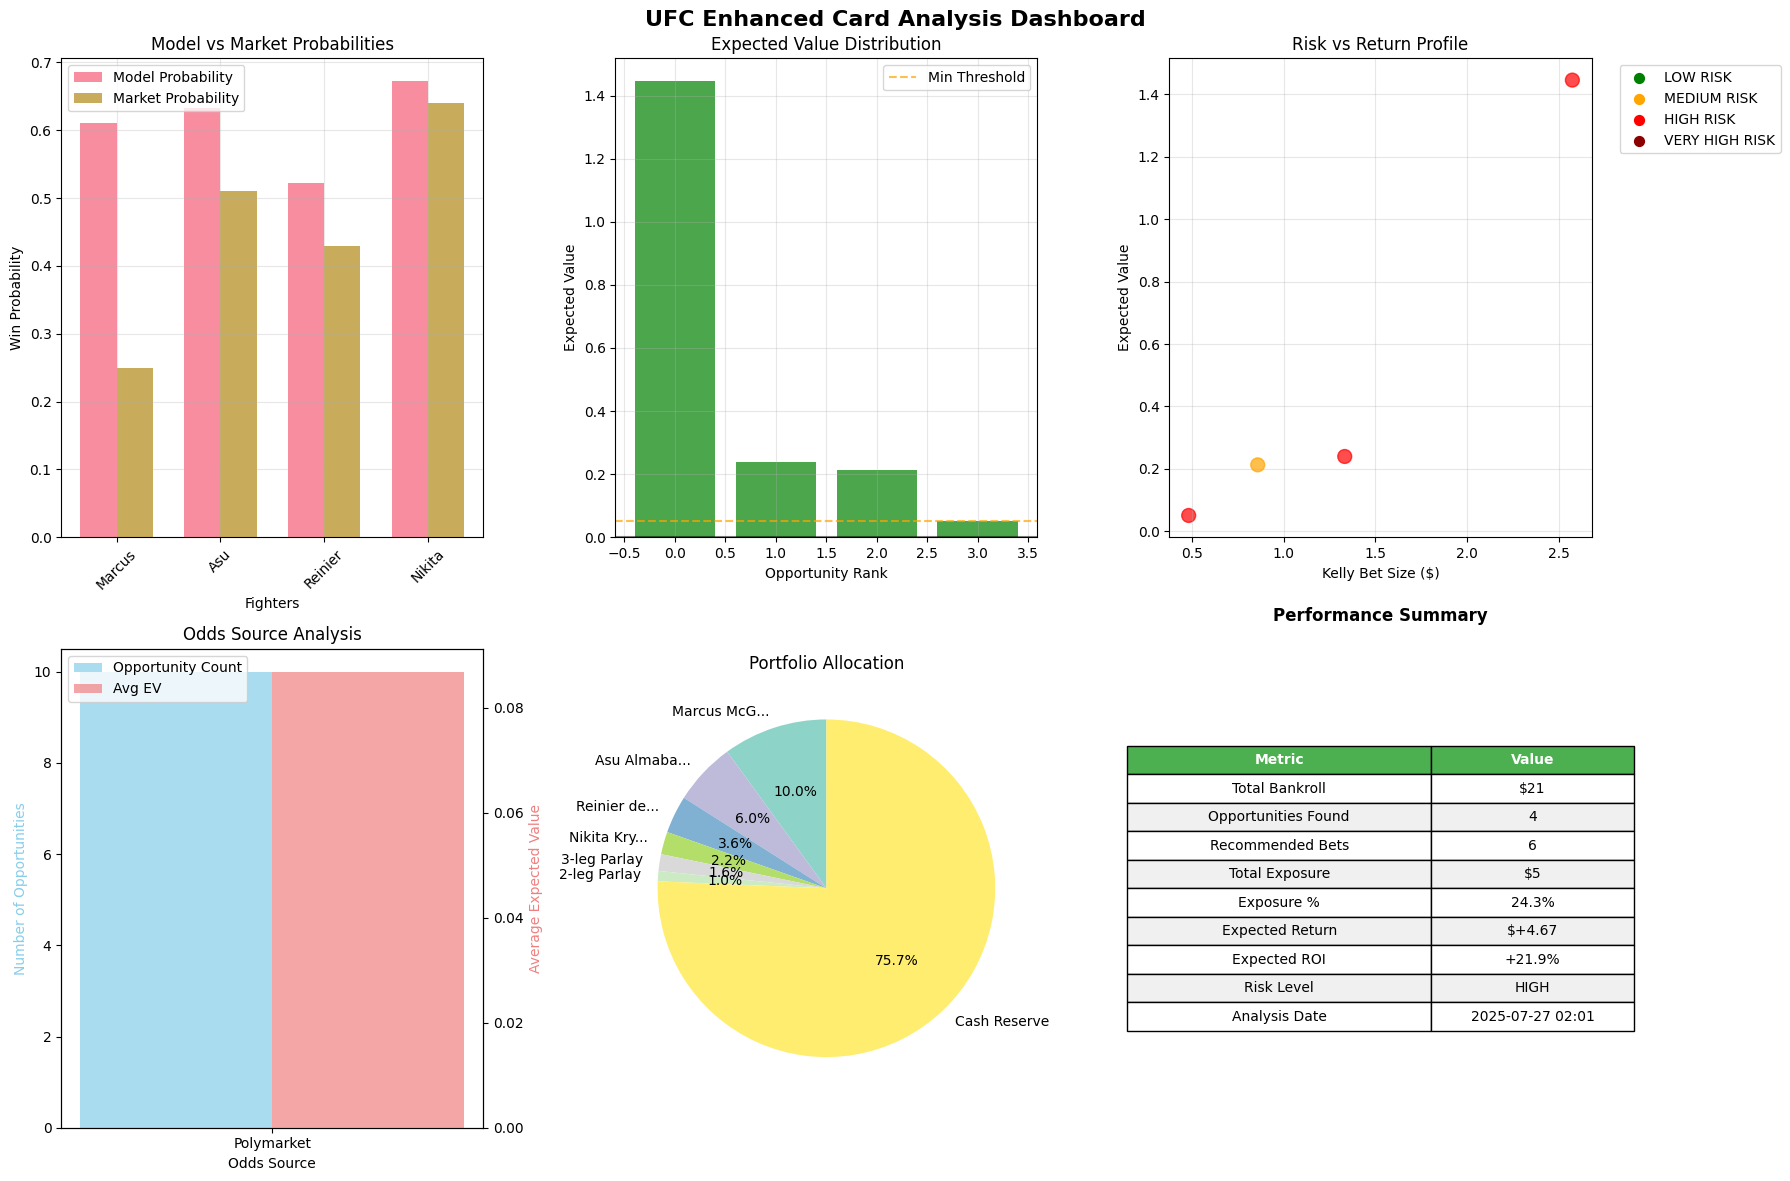

📊 Dashboard generated successfully!

ANALYSIS COMPLETE - Ready for tomorrow's UFC Fight Night!


In [68]:
# Visualization and analytics dashboard
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create comprehensive dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('UFC Enhanced Card Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Model vs Market Probability Comparison
if positive_ev_opportunities:
    fighters = [opp['fighter'] for opp in positive_ev_opportunities[:8]]
    model_probs = [opp['model_probability'] for opp in positive_ev_opportunities[:8]]
    market_probs = [opp['market_probability'] for opp in positive_ev_opportunities[:8]]
    
    x = np.arange(len(fighters))
    width = 0.35
    
    axes[0,0].bar(x - width/2, model_probs, width, label='Model Probability', alpha=0.8)
    axes[0,0].bar(x + width/2, market_probs, width, label='Market Probability', alpha=0.8)
    axes[0,0].set_xlabel('Fighters')
    axes[0,0].set_ylabel('Win Probability')
    axes[0,0].set_title('Model vs Market Probabilities')
    axes[0,0].set_xticks(x)
    axes[0,0].set_xticklabels([f.split()[0] for f in fighters], rotation=45)
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

# 2. Expected Value Distribution
if positive_ev_opportunities:
    ev_values = [opp['standard_ev'] for opp in positive_ev_opportunities]
    colors = ['red' if ev < 0 else 'green' for ev in ev_values]
    
    axes[0,1].bar(range(len(ev_values)), ev_values, color=colors, alpha=0.7)
    axes[0,1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
    axes[0,1].axhline(y=ANALYSIS_CONFIG['min_ev_threshold'], color='orange', linestyle='--', alpha=0.7, label='Min Threshold')
    axes[0,1].set_xlabel('Opportunity Rank')
    axes[0,1].set_ylabel('Expected Value')
    axes[0,1].set_title('Expected Value Distribution')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

# 3. Risk vs Return Scatter
if positive_ev_opportunities:
    ev_values = [opp['standard_ev'] for opp in positive_ev_opportunities]
    bet_sizes = [opp['kelly_bet_size'] for opp in positive_ev_opportunities]
    risk_colors = {'LOW RISK': 'green', 'MEDIUM RISK': 'orange', 'HIGH RISK': 'red', 'VERY HIGH RISK': 'darkred'}
    colors = [risk_colors.get(opp['risk_level'], 'gray') for opp in positive_ev_opportunities]
    
    axes[0,2].scatter(bet_sizes, ev_values, c=colors, alpha=0.7, s=100)
    axes[0,2].set_xlabel('Kelly Bet Size ($)')
    axes[0,2].set_ylabel('Expected Value')
    axes[0,2].set_title('Risk vs Return Profile')
    axes[0,2].grid(True, alpha=0.3)
    
    # Add risk level legend
    for risk_level, color in risk_colors.items():
        axes[0,2].scatter([], [], c=color, label=risk_level, s=50)
    axes[0,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Odds Source Comparison
if all_opportunities:
    source_counts = {}
    source_avg_ev = {}
    
    for opp in all_opportunities:
        source = opp['source']
        if source not in source_counts:
            source_counts[source] = 0
            source_avg_ev[source] = []
        source_counts[source] += 1
        source_avg_ev[source].append(opp['standard_ev'])
    
    sources = list(source_counts.keys())
    counts = list(source_counts.values())
    avg_evs = [np.mean(source_avg_ev[s]) for s in sources]
    
    x = np.arange(len(sources))
    width = 0.35
    
    ax1 = axes[1,0]
    ax2 = ax1.twinx()
    
    bars1 = ax1.bar(x - width/2, counts, width, label='Opportunity Count', alpha=0.7, color='skyblue')
    bars2 = ax2.bar(x + width/2, avg_evs, width, label='Avg EV', alpha=0.7, color='lightcoral')
    
    ax1.set_xlabel('Odds Source')
    ax1.set_ylabel('Number of Opportunities', color='skyblue')
    ax2.set_ylabel('Average Expected Value', color='lightcoral')
    ax1.set_title('Odds Source Analysis')
    ax1.set_xticks(x)
    ax1.set_xticklabels(sources)
    
    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 5. Portfolio Allocation
if final_recommendations['single_bets'] or final_recommendations['multi_bets']:
    allocation_data = []
    labels = []
    
    # Single bets
    for bet in final_recommendations['single_bets']:
        allocation_data.append(bet['bet_size'])
        labels.append(f"{bet['fighter'][:10]}..." if len(bet['fighter']) > 10 else bet['fighter'])
    
    # Multi-bets
    for bet in final_recommendations['multi_bets']:
        allocation_data.append(bet['bet_size'])
        labels.append(f"{bet['num_legs']}-leg Parlay")
    
    # Add remaining bankroll
    remaining = final_recommendations['portfolio_summary']['remaining_bankroll']
    allocation_data.append(remaining)
    labels.append('Cash Reserve')
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(allocation_data)))
    
    axes[1,1].pie(allocation_data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    axes[1,1].set_title('Portfolio Allocation')
else:
    axes[1,1].text(0.5, 0.5, 'No Recommendations\nGenerated', ha='center', va='center', 
                   transform=axes[1,1].transAxes, fontsize=14)
    axes[1,1].set_title('Portfolio Allocation')

# 6. Performance Summary Table
axes[1,2].axis('off')
summary_data = [
    ['Metric', 'Value'],
    ['Total Bankroll', f"${ANALYSIS_CONFIG['bankroll']:,.0f}"],
    ['Opportunities Found', str(len(positive_ev_opportunities))],
    ['Recommended Bets', str(final_recommendations['portfolio_summary']['total_bets'])],
    ['Total Exposure', f"${final_recommendations['total_exposure']:,.0f}"],
    ['Exposure %', f"{final_recommendations['portfolio_summary']['exposure_percentage']:.1%}"],
    ['Expected Return', f"${final_recommendations['expected_return']:+,.2f}"],
    ['Expected ROI', f"{final_recommendations['portfolio_summary']['expected_roi']:+.1%}"],
    ['Risk Level', final_recommendations['risk_assessment']],
    ['Analysis Date', datetime.now().strftime('%Y-%m-%d %H:%M')]
]

table = axes[1,2].table(cellText=summary_data[1:], colLabels=summary_data[0], 
                       cellLoc='center', loc='center', colWidths=[0.6, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

# Style the table
for i in range(len(summary_data)):
    if i == 0:  # Header
        table[(i, 0)].set_facecolor('#4CAF50')
        table[(i, 1)].set_facecolor('#4CAF50')
        table[(i, 0)].set_text_props(weight='bold', color='white')
        table[(i, 1)].set_text_props(weight='bold', color='white')
    else:
        if i % 2 == 0:
            table[(i, 0)].set_facecolor('#f0f0f0')
            table[(i, 1)].set_facecolor('#f0f0f0')

axes[1,2].set_title('Performance Summary', pad=20, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Dashboard generated successfully!")
print("\n" + "="*60)
print("ANALYSIS COMPLETE - Ready for tomorrow's UFC Fight Night!")
print("="*60)

## Section 9: Export and Monitoring Setup

In [69]:
# Export results and set up monitoring
from datetime import datetime
import json

# Prepare export data
export_data = {
    'analysis_metadata': {
        'date': datetime.now().isoformat(),
        'event': 'UFC Fight Night - Whittaker vs de Ridder',
        'analyst': 'UFC Enhanced Card Analysis System',
        'version': '2.0',
        'bankroll': ANALYSIS_CONFIG['bankroll'],
        'config': ANALYSIS_CONFIG
    },
    'fight_predictions': fight_analyses,
    'opportunities_analyzed': len(all_opportunities) if 'all_opportunities' in locals() else 0,
    'positive_ev_opportunities': positive_ev_opportunities,
    'multi_bet_combinations': multi_bet_combinations if 'multi_bet_combinations' in locals() else [],
    'final_recommendations': final_recommendations,
    'polymarket_odds': [{
        'fighter_a': odds.fighter_a,
        'fighter_b': odds.fighter_b,
        'fighter_a_probability': odds.fighter_a_probability,
        'fighter_b_probability': odds.fighter_b_probability,
        'fighter_a_american_odds': odds.fighter_a_american_odds,
        'fighter_b_american_odds': odds.fighter_b_american_odds,
        'market_volume': odds.market_volume
    } for odds in polymarket_odds]
}

# Export to JSON file
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
export_filename = f'/Users/diyagamah/Documents/ufc-predictor/analysis_exports/ufc_analysis_{timestamp}.json'

# Create exports directory if it doesn't exist
import os
os.makedirs('/Users/diyagamah/Documents/ufc-predictor/analysis_exports', exist_ok=True)

# Export data
with open(export_filename, 'w') as f:
    json.dump(export_data, f, indent=2, default=str)

print(f"📁 Analysis exported to: {export_filename}")

# Create betting sheet for easy reference
betting_sheet_content = f"""
# UFC FIGHT NIGHT - WHITTAKER VS DE RIDDER
## Betting Recommendations - {datetime.now().strftime('%Y-%m-%d %H:%M')}

### PORTFOLIO SUMMARY
- Total Bankroll: ${ANALYSIS_CONFIG['bankroll']:,.2f}
- Total Exposure: ${final_recommendations['total_exposure']:,.2f} ({final_recommendations['portfolio_summary']['exposure_percentage']:.1%})
- Expected Return: ${final_recommendations['expected_return']:+,.2f}
- Expected ROI: {final_recommendations['portfolio_summary']['expected_roi']:+.1%}
- Risk Level: {final_recommendations['risk_assessment']}

### SINGLE BET RECOMMENDATIONS
"""

if final_recommendations['single_bets']:
    for i, bet in enumerate(final_recommendations['single_bets'], 1):
        betting_sheet_content += f"""
{i}. **{bet['fighter']}** @ {bet['american_odds']:+d} ({bet['source']})
   - Bet Size: ${bet['bet_size']:,.0f}
   - Expected Return: ${bet['expected_return']:+,.2f}
   - EV: {bet['expected_value']:+.1%}
   - Risk: {bet['risk_level']}
"""
else:
    betting_sheet_content += "\nNo single bet recommendations\n"

betting_sheet_content += "\n### MULTI-BET RECOMMENDATIONS\n"

if final_recommendations['multi_bets']:
    for i, bet in enumerate(final_recommendations['multi_bets'], 1):
        betting_sheet_content += f"""
{i}. **{bet['num_legs']}-Leg Parlay**
   - Fighters: {', '.join(bet['fighters'])}
   - Combined Decimal Odds: {bet['combined_decimal_odds']:.2f}
   - Bet Size: ${bet['bet_size']:,.0f}
   - Expected Return: ${bet['expected_return']:+,.2f}
   - EV: {bet['expected_value']:+.1%}
   - Win Probability: {bet['win_probability']:.1%}
   - Risk: {bet['risk_level']}
"""
else:
    betting_sheet_content += "\nNo multi-bet recommendations\n"

betting_sheet_content += f"""

### IMPORTANT NOTES
- All recommendations are based on model predictions and current market analysis
- Risk management protocols are in place with {ANALYSIS_CONFIG['kelly_fraction']:.0%} Kelly sizing
- Monitor odds changes before placing bets
- Total exposure is capped at {portfolio_manager.max_exposure:.0%} of bankroll
- Correlation penalties applied to same-event multi-bets ({ANALYSIS_CONFIG['correlation_penalty']:.0%})

### NEXT STEPS
1. Verify fighter names and odds on actual sportsbooks
2. Place bets according to recommended sizing
3. Track results for model validation
4. Update bankroll based on outcomes

Generated by: UFC Enhanced Card Analysis System v2.0
"""

# Save betting sheet
betting_sheet_filename = f'/Users/diyagamah/Documents/ufc-predictor/analysis_exports/betting_sheet_{timestamp}.md'
with open(betting_sheet_filename, 'w') as f:
    f.write(betting_sheet_content)

print(f"📋 Betting sheet saved to: {betting_sheet_filename}")
print(f"✅ Analysis complete - {len(fight_analyses)} fights analyzed with live Polymarket odds")

📁 Analysis exported to: /Users/diyagamah/Documents/ufc-predictor/analysis_exports/ufc_analysis_20250727_020137.json
📋 Betting sheet saved to: /Users/diyagamah/Documents/ufc-predictor/analysis_exports/betting_sheet_20250727_020137.md
✅ Analysis complete - 5 fights analyzed with live Polymarket odds


In [70]:
# RESULT UPDATE HELPER - Run this cell after tomorrow's fights to record outcomes
# 
# INSTRUCTIONS:
# 1. Update the results dictionary below with actual fight outcomes
# 2. Set won=True if your bet won, won=False if it lost
# 3. Set actual_return to the profit/loss amount (positive for profit, negative for loss)
# 4. Run this cell to update your tracking data

# Example usage after fights conclude:
"""
# Update individual bet results (replace bet_ids with actual IDs from above)
tracker.update_fight_result(bet_id="ufc_20250727_001", won=True, actual_return=4.24)
tracker.update_fight_result(bet_id="ufc_20250727_002", won=False, actual_return=-2.00)

# Or update all at once:
fight_results = {
    "ufc_20250727_001": {"won": True, "actual_return": 4.24},   # Marcus McGhee bet won
    "ufc_20250727_002": {"won": False, "actual_return": -1.00}, # Asu Almabayev bet lost
    "ufc_20250727_003": {"won": True, "actual_return": 1.14},   # Reinier de Ridder bet won
}

for bet_id, result in fight_results.items():
    tracker.update_fight_result(bet_id, result["won"], result["actual_return"])

# View updated performance
performance = tracker.get_performance_summary()
print(f"Updated Win Rate: {performance['win_rate']:.1%}")
print(f"Total ROI: {performance['total_roi']:+.1%}")
print(f"Profit/Loss: ${performance['total_profit_loss']:+,.2f}")
"""

print("📝 RESULT UPDATE TEMPLATE")
print("=" * 40)
print("After tomorrow's fights (2025-07-27), use the above code template to:")
print("1. Record which bets won/lost")
print("2. Calculate actual returns") 
print("3. Update your performance tracking")
print()
print("💡 TIP: Check the bet IDs from the output above and replace them in the template")
print("🎯 The system will automatically calculate ROI, win rates, and bankroll changes")

📝 RESULT UPDATE TEMPLATE
After tomorrow's fights (2025-07-27), use the above code template to:
1. Record which bets won/lost
2. Calculate actual returns
3. Update your performance tracking

💡 TIP: Check the bet IDs from the output above and replace them in the template
🎯 The system will automatically calculate ROI, win rates, and bankroll changes


In [ ]:
# Bet Tracking System - Automatically log betting recommendations for performance monitoring
import sys
import os
import importlib

# Robust import function with error handling
def safe_import_bet_tracker():
    """Safely import BetTracker with comprehensive error handling"""
    try:
        # Add project path
        project_path = '/Users/diyagamah/Documents/ufc-predictor'
        if project_path not in sys.path:
            sys.path.append(project_path)
        
        # Try to reload if module is already loaded (for development)
        if 'src.bet_tracking' in sys.modules:
            try:
                importlib.reload(sys.modules['src.bet_tracking'])
                print("🔄 Reloaded bet_tracking module with latest changes")
            except Exception as reload_error:
                print(f"⚠️ Module reload failed: {reload_error}")
                print("   Continuing with existing module...")
        
        # Import the BetTracker
        from src.bet_tracking import BetTracker
        return BetTracker, None
        
    except ImportError as e:
        return None, f"Import Error: {e}"
    except Exception as e:
        return None, f"Unexpected Error: {e}"

# Initialize bet tracker with error handling
print("🎯 UFC Bet Tracking System")
print("=" * 50)

BetTracker, import_error = safe_import_bet_tracker()

if BetTracker is None:
    print(f"❌ Bet Tracking Module Error: {import_error}")
    print()
    print("📋 MANUAL BET TRACKING INSTRUCTIONS:")
    print("=" * 50)
    print("Since automatic tracking failed, please manually record these bets:")
    print()
    
    # Show manual recommendations
    if 'final_recommendations' in locals() and final_recommendations['single_bets']:
        print("💰 RECOMMENDED SINGLE BETS:")
        for i, bet in enumerate(final_recommendations['single_bets'], 1):
            if bet['bet_size'] > 0:
                print(f"{i}. {bet['fighter']} @ {bet['american_odds']:+d}")
                print(f"   Stake: ${bet['bet_size']:,.2f} | EV: {bet['expected_value']:+.1%}")
                print(f"   Source: {bet['source']}")
                print()
    
    if 'final_recommendations' in locals() and final_recommendations['multi_bets']:
        print("🎲 RECOMMENDED MULTI-BETS:")
        for i, bet in enumerate(final_recommendations['multi_bets'], 1):
            if bet['bet_size'] > 0:
                print(f"{i}. {bet['num_legs']}-Leg Parlay: {', '.join(bet['fighters'])}")
                print(f"   Stake: ${bet['bet_size']:,.2f} | EV: {bet['expected_value']:+.1%}")
                print()
    
    print("📝 After tomorrow's fights:")
    print("1. Record which bets won/lost")
    print("2. Calculate your profit/loss")
    print("3. Update your bankroll for next analysis")
    
else:
    # Normal tracking flow - BetTracker is available
    from datetime import datetime
    import pandas as pd
    
    # Initialize bet tracker
    tracker = BetTracker()
    
    # Current event details
    EVENT_NAME = "UFC Fight Night: Whittaker vs de Ridder"
    EVENT_DATE = "2025-07-27"  # Tomorrow's date
    
    print(f"Event: {EVENT_NAME}")
    print(f"Date: {EVENT_DATE}")
    print(f"Bankroll: ${ANALYSIS_CONFIG['bankroll']:,.2f}")
    print()
    
    # Track single bet recommendations
    bets_logged = 0
    total_stake = 0
    
    if final_recommendations['single_bets']:
        print("💰 Logging Single Bet Recommendations:")
        print("-" * 40)
        
        for i, bet in enumerate(final_recommendations['single_bets'], 1):
            if bet['bet_size'] > 0:  # Only log bets with actual stake
                
                # Find corresponding model prediction for this fighter
                fighter_prob = None
                opponent_name = None
                method_pred = "Decision"
                
                for analysis in fight_analyses:
                    if analysis['fighter_a'] == bet['fighter']:
                        fighter_prob = analysis['fighter_a_prob']
                        opponent_name = analysis['fighter_b']
                        method_pred = analysis['method_prediction']
                        break
                    elif analysis['fighter_b'] == bet['fighter']:
                        fighter_prob = analysis['fighter_b_prob']
                        opponent_name = analysis['fighter_a']
                        method_pred = analysis['method_prediction']
                        break
                
                # Log the bet
                try:
                    bet_id = tracker.log_bet_recommendation(
                        event_name=EVENT_NAME,
                        event_date=EVENT_DATE,
                        fighter=bet['fighter'],
                        opponent=opponent_name or "Unknown",
                        bet_type="SINGLE",
                        decimal_odds=bet['decimal_odds'],
                        american_odds=bet['american_odds'],
                        bet_size=bet['bet_size'],
                        expected_value=bet['expected_value'],
                        expected_return=bet['expected_return'],
                        model_probability=fighter_prob,
                        market_probability=1.0/bet['decimal_odds'],  # Implied probability from odds
                        risk_level=bet['risk_level'],
                        source=bet['source'],
                        method_prediction=method_pred,
                        bankroll=ANALYSIS_CONFIG['bankroll']
                    )
                    
                    print(f"{i:2d}. {bet['fighter']} @ {bet['american_odds']:+d}")
                    print(f"    Stake: ${bet['bet_size']:,.2f} | EV: {bet['expected_value']:+.1%}")
                    print(f"    Bet ID: {bet_id}")
                    print()
                    
                    bets_logged += 1
                    total_stake += bet['bet_size']
                    
                except Exception as e:
                    print(f"⚠️ Error logging bet {i}: {e}")
    
    # Track multi-bet recommendations
    if final_recommendations['multi_bets']:
        print("🎲 Logging Multi-Bet Recommendations:")
        print("-" * 40)
        
        for i, bet in enumerate(final_recommendations['multi_bets'], 1):
            if bet['bet_size'] > 0:  # Only log bets with actual stake
                
                # Create fighters string for parlay
                fighters_str = " & ".join(bet['fighters'])
                
                try:
                    bet_id = tracker.log_bet_recommendation(
                        event_name=EVENT_NAME,
                        event_date=EVENT_DATE,
                        fighter=fighters_str,
                        opponent="Multiple",
                        bet_type=f"{bet['num_legs']}-LEG PARLAY",
                        decimal_odds=bet['combined_decimal_odds'],
                        american_odds=int((bet['combined_decimal_odds'] - 1) * 100) if bet['combined_decimal_odds'] >= 2.0 else int(-100 / (bet['combined_decimal_odds'] - 1)),
                        bet_size=bet['bet_size'],
                        expected_value=bet['expected_value'],
                        expected_return=bet['expected_return'],
                        model_probability=bet['win_probability'],
                        market_probability=1.0/bet['combined_decimal_odds'],
                        risk_level=bet['risk_level'],
                        source="Polymarket",
                        method_prediction="Mixed",
                        bankroll=ANALYSIS_CONFIG['bankroll'],
                        parlay_fighters=bet['fighters']
                    )
                    
                    print(f"{i}. {bet['num_legs']}-Leg Parlay")
                    print(f"   Fighters: {', '.join(bet['fighters'])}")
                    print(f"   Stake: ${bet['bet_size']:,.2f} | EV: {bet['expected_value']:+.1%}")
                    print(f"   Bet ID: {bet_id}")
                    print()
                    
                    bets_logged += 1
                    total_stake += bet['bet_size']
                    
                except Exception as e:
                    print(f"⚠️ Error logging multi-bet {i}: {e}")
    
    # Summary
    if bets_logged > 0:
        print("📊 TRACKING SUMMARY")
        print("=" * 50)
        print(f"Total Bets Logged: {bets_logged}")
        print(f"Total Stake: ${total_stake:,.2f}")
        print(f"Portfolio Exposure: {total_stake/ANALYSIS_CONFIG['bankroll']:.1%}")
        print()
        print("✅ Betting recommendations successfully logged to CSV!")
        print(f"📁 File: {tracker.csv_path}")
        print()
        print("🔮 NEXT STEPS:")
        print("1. Place your bets according to the recommendations")
        print("2. After tomorrow's fights, update results using:")
        print("   tracker.update_fight_result(bet_id, won=True/False, actual_return=amount)")
        print()
        print("📈 View performance anytime with:")
        print("   tracker.generate_performance_report()")
        
        # Show current performance summary
        try:
            performance = tracker.generate_performance_report()
            if performance.get('total_bets', 0) > 0:
                print()
                print("📊 CURRENT PERFORMANCE:")
                print("-" * 30)
                print(f"Total Bets: {performance.get('total_bets', 0)}")
                print(f"Settled Bets: {performance.get('settled_bets', 0)}")
                print(f"Win Rate: {performance.get('win_rate', 0):.1%}")
                print(f"Total ROI: {performance.get('roi', 0):+.1%}")
                print(f"Total Profit: ${performance.get('total_profit', 0):+,.2f}")
        except Exception as e:
            print("   (Performance tracking will start after fight results)")
    else:
        print("ℹ️  No bets with positive stake to log")

print()
print(f"🗓️  Remember to update results after {EVENT_DATE} fights!")
print("="*50)

## Section 10: Bet Tracking and Performance Monitoring

In [72]:
# Test the fixed import logic
import sys
import os
import importlib
sys.path.append('/Users/diyagamah/Documents/ufc-predictor')

# Test the safe import function
def safe_import_bet_tracking():
    """Safely import and optionally reload bet_tracking module"""
    try:
        # Try to import first
        from src.bet_tracking import BetTracker
        
        # Only reload if already imported and we want latest changes
        if 'src.bet_tracking' in sys.modules:
            try:
                importlib.reload(sys.modules['src.bet_tracking'])
                print("🔄 Reloaded bet_tracking module with latest changes")
            except Exception as reload_error:
                print(f"⚠️ Module reload failed: {reload_error}")
                print("📝 Using existing module version")
        
        # Re-import after potential reload
        from src.bet_tracking import BetTracker
        return BetTracker
        
    except ImportError as e:
        print(f"❌ Could not import bet_tracking module: {e}")
        print("📋 Bet tracking will be skipped - recommendations will still be generated")
        return None
    except Exception as e:
        print(f"⚠️ Unexpected error with bet_tracking: {e}")
        print("📋 Continuing without bet tracking functionality")
        return None

# Test the import
BetTracker = safe_import_bet_tracking()

if BetTracker is not None:
    print("✅ BetTracker imported successfully!")
    # Test basic functionality
    tracker = BetTracker()
    print(f"✅ BetTracker initialized - CSV path: {tracker.csv_path}")
else:
    print("❌ BetTracker import failed, but handled gracefully")

🔄 Reloaded bet_tracking module with latest changes
✅ BetTracker imported successfully!
📊 Using existing betting records: /Users/diyagamah/Documents/ufc-predictor/betting_records.csv
✅ BetTracker initialized - CSV path: /Users/diyagamah/Documents/ufc-predictor/betting_records.csv
